# PROYECTO GRUPAL DGA

    GRUPO 2

    Integrantes:
        - Juan Pablo Heredia Castelló | jpheredia.edu@gmail.com


# 1. IMPORTACIÓN DE LIBRERÍAS


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2. IMPORTACIÓN Y PRIMERA INSPECCIÓN DE DATOS

In [2]:
df = pd.read_csv("dga_dataset_safe.csv", sep=",", encoding="utf-8")

df.head()


,lenght,ngram_count,entropy,type
0,continuous,continuous,continuous,discrete
1,NaN,NaN,NaN,class
2,25.0,0.9030899869919435,4.053660689688185,dga
3,26.0,0.8450980400142568,3.9500637564362093,dga
4,12.0,2.9030899869919438,3.188721875540867,dga


In [3]:
df.tail()


,lenght,ngram_count,entropy,type
24070,7.0,7.3153824963149905,2.8073549220576046,legit
24071,14.0,39.85682442887054,3.2359263506290334,legit
24072,26.0,0.9030899869919435,4.286790198827112,dga
24073,10.0,12.978671778835801,3.121928094887362,legit
24074,27.0,0.3010299956639812,4.134336113194452,dga


"type" es una variable categorica, vamos a comprobar que categorías existen

In [8]:
df["type"].unique()

array(['dga', 'legit'], dtype=object)

Hay 2 valores en la columna "type" que son "discrete" y "class" que parecen ser una forma de clasificar el tipo de datos de dicha columna, se comprueba esto a continuación

In [4]:

# Contar la cantidad de valores "discrete" y "class" en la columna "type"
print("Discrete: ", (df["type"] == "discrete").sum())
print("Class: ", (df["type"] == "class").sum())


Discrete:  1
Class:  1


Como estos solo aparecen 1 vez, se pueden eliminar la columna "type"


In [5]:
# Eliminar las 2 primeras filas del dataset
df = df.iloc[2:].reset_index(drop=True) # Usar reset_index para que los cambios se guarden directamente en el dataframe

# Verificar que las filas se hayan eliminado correctamente
df.head()



,lenght,ngram_count,entropy,type
0,25.0,0.9030899869919435,4.053660689688185,dga
1,26.0,0.8450980400142568,3.9500637564362093,dga
2,12.0,2.9030899869919438,3.188721875540867,dga
3,9.0,15.023867217706147,2.94770277922009,legit
4,10.0,24.764260381085812,2.9219280948873623,legit


Vamos a comprobar los tipos de datos y si es necesario realizar ciertas transformaciones

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24073 entries, 0 to 24072
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   lenght       24073 non-null  object
 1   ngram_count  24073 non-null  object
 2   entropy      24073 non-null  object
 3   type         24073 non-null  object
dtypes: object(4)
memory usage: 752.4+ KB


Las variables de nuestro dataframe deberían corresponder con los siguientes tipos de datos:

- length: Longitud del nombre del dominio (variable numérica continua).
- ngram_count: Conteo de n-gramas presentes en el dominio (variable numérica continua).
- entropy: Medida de la aleatoriedad del dominio (variable numérica continua).
- type: Clasificación del dominio como DGA o legítimo (variable categórica).



In [7]:
# Convertir las columnas numéricas a los dtypes correctos

df = df.astype({
    'lenght': 'float64',
    'ngram_count': 'float64', 
    'entropy': 'float64',
})


# 2. EDA (Analisis Exploratorio de Datos)

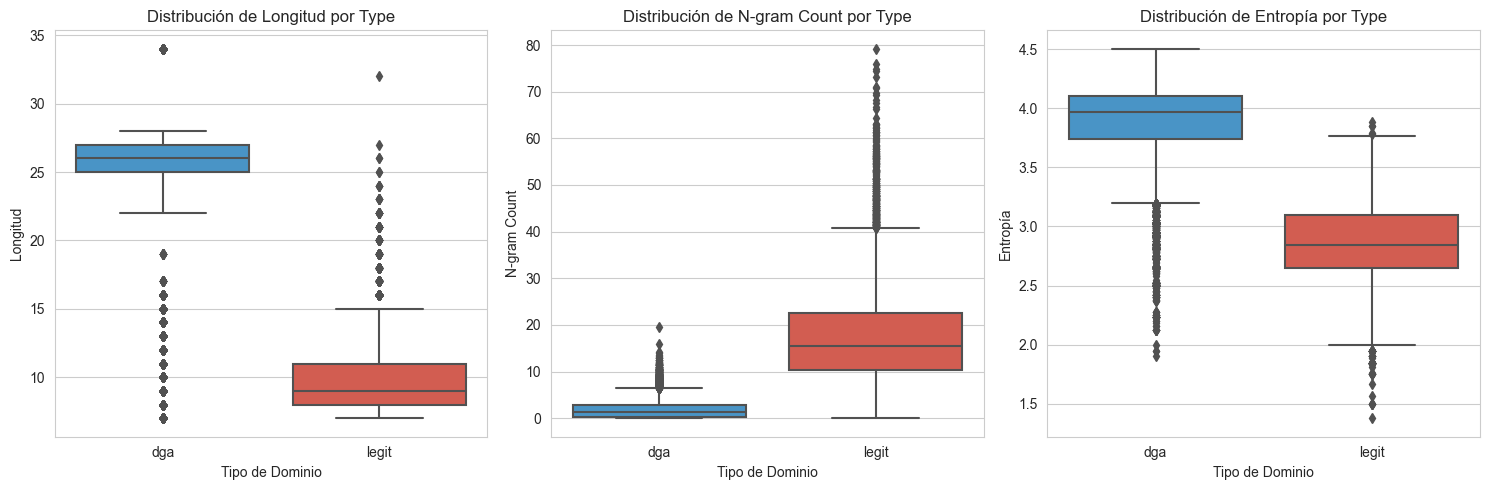


Estadísticas para lenght:
         count       mean       std  min   25%   50%   75%   max
type                                                            
dga    14741.0  24.372566  6.141567  7.0  25.0  26.0  27.0  34.0
legit   9332.0   9.939563  2.821369  7.0   8.0   9.0  11.0  32.0

Estadísticas para ngram_count:
         count       mean        std  min        25%        50%        75%  \
type                                                                         
dga    14741.0   1.887875   1.973438  0.0   0.301030   1.342423   2.766413   
legit   9332.0  17.586773  10.103633  0.0  10.310832  15.490272  22.497009   

             max  
type              
dga    19.492867  
legit  79.171842  

Estadísticas para entropy:
         count      mean       std       min       25%       50%       75%  \
type                                                                         
dga    14741.0  3.849046  0.395179  1.905639  3.741156  3.967720  4.103910   
legit   9332.0  2.856246  0.32

In [13]:
# Comparar variables categoricas por tipo de "type" usando boxplots

# Crear subplots para los boxplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Personalizar estilo
sns.set_style("whitegrid")
colors = ['#3498db', '#e74c3c']

# Boxplot para longitud
sns.boxplot(x='type', y='lenght', data=df, ax=axes[0], palette=colors)
axes[0].set_title('Distribución de Longitud por Type')
axes[0].set_xlabel('Tipo de Dominio')
axes[0].set_ylabel('Longitud')

# Boxplot para ngram_count
sns.boxplot(x='type', y='ngram_count', data=df, ax=axes[1], palette=colors)
axes[1].set_title('Distribución de N-gram Count por Type')
axes[1].set_xlabel('Tipo de Dominio')
axes[1].set_ylabel('N-gram Count')

# Boxplot para entropy
sns.boxplot(x='type', y='entropy', data=df, ax=axes[2], palette=colors)
axes[2].set_title('Distribución de Entropía por Type')
axes[2].set_xlabel('Tipo de Dominio')
axes[2].set_ylabel('Entropía')

# Ajustar el layout
plt.tight_layout()
plt.show()

# Mostrar estadísticas resumidas para cada variable por tipo
for column in ['lenght', 'ngram_count', 'entropy']:
    print(f"\nEstadísticas para {column}:")
    print(df.groupby('type')[column].describe())


A partir de la representacion del boxplot se pueden extraer las siguientes conclusiones:

- El dataset presenta más ejemplos de dominios clasificados como dga que legit en una relación de 1,57:1, la cual no es muy significativa
- Para cada una de las variables, al clasificarlas por su tipo se pueden observar dos puntos importantes
    1. Las distribuciones son suficientemente distintivas entre grupos, lo que facilitará la tarea de aplicación de algoritmos de clasificación
    2. Para cada tipo las ditribuciones presentan una gran cantidad de outliers, esto dificulta la tarea de clasificación, por lo que será el proximo punto a considerar.
- Para la variable "lenght" se puede observar una diferencia considerable entre la longitud de los dominios "legit" y "dga" donde los dominios dga suelen ser mas largos
- En cuanto a la variable "ngram_count" se puede observar que los dominios "legit" tienen un "ngram_count" mucho más alto en promedio y en general en toda la distribución de percentiles.
- Aunque existen diferencias para la variable "entropy" entre ambas clases de dominios, con esta visualización no se puede sacar una conclusion sufientemente representativa, por lo que una buena propuesta será realizar un test de correlacion o un test de significancia estadistica para obtener mayor seguridad.

Podemos observar cuanto correlacionadas están las variables con la variable target, para ello primero realizaremos un hot-encoding de la variable target donde "legit" = 1 y "DGA" = 0, tras esto visualizaremos el mapa de calor.

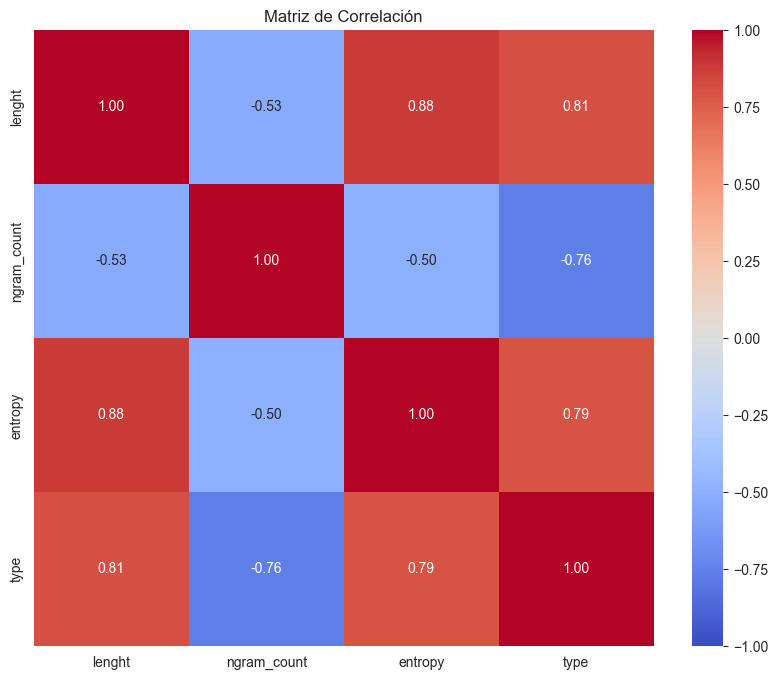

In [19]:
# 1. Crear una copia del dataframe y convertir 'type' a numérico
df_corr = df.copy()
df_corr['type'] = df_corr['type'].map({'legit': 0, 'dga': 1})

# 2. Calcular y visualizar la matriz de correlación completa
correlation_matrix = df_corr.corr()

# 3. Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,  # Mostrar valores
            cmap='coolwarm',  # Esquema de colores
            vmin=-1, vmax=1,  # Rango de valores
            center=0,  # Centro del colormap
            fmt='.2f')  # Formato de números
plt.title('Matriz de Correlación')
plt.show()



Para realizar una correcta lectura del mapa de calor debemos tener en cuenta que cuanto menor sea la correlacion con la variable "type" (correlación negativa) esto indicará que más correlacionada está con ser un dominio de tipo "legit", por el contrario cuanto mayor sea la correlación (correlación positiva) mayor será la asociacion de dicha variable con un dominio "dga".

Conclusiones:

- length y type 

